# Load the Data

In [127]:
import pandas as pd

data = pd.read_csv('all_data.csv')

# Explore and Explain Data

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [129]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


We can see that there is no missing data. All collons are of the correct type.

In [130]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [131]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

# Has life expectancy increased over time in the six nations?

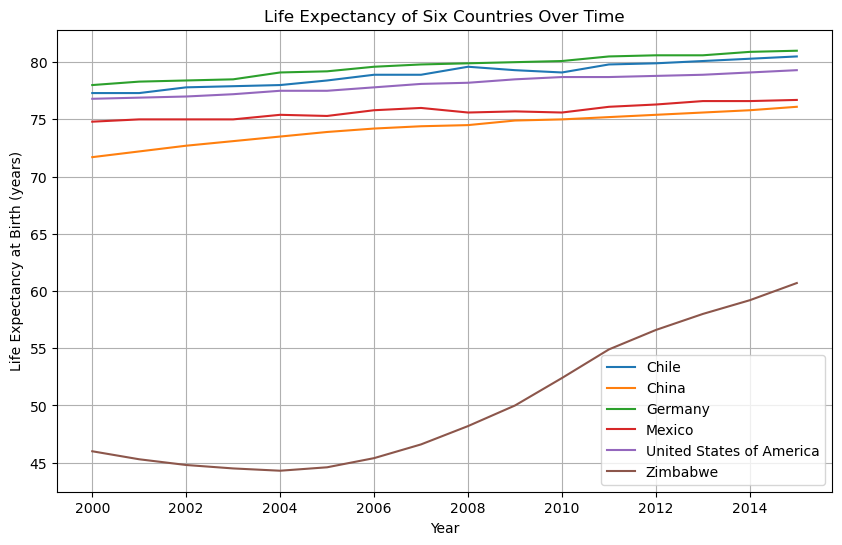

In [132]:
import matplotlib.pyplot as plt

# Select data for the six countries
countries = data.Country.unique()
df_selected = data[data['Country'].isin(countries)]

# Plotting the data
plt.figure(figsize=(10, 6))

for country in countries:
    country_data = df_selected[df_selected['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy at birth (years)'], label=country)

plt.title('Life Expectancy of Six Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend()
plt.grid(True)
plt.show()

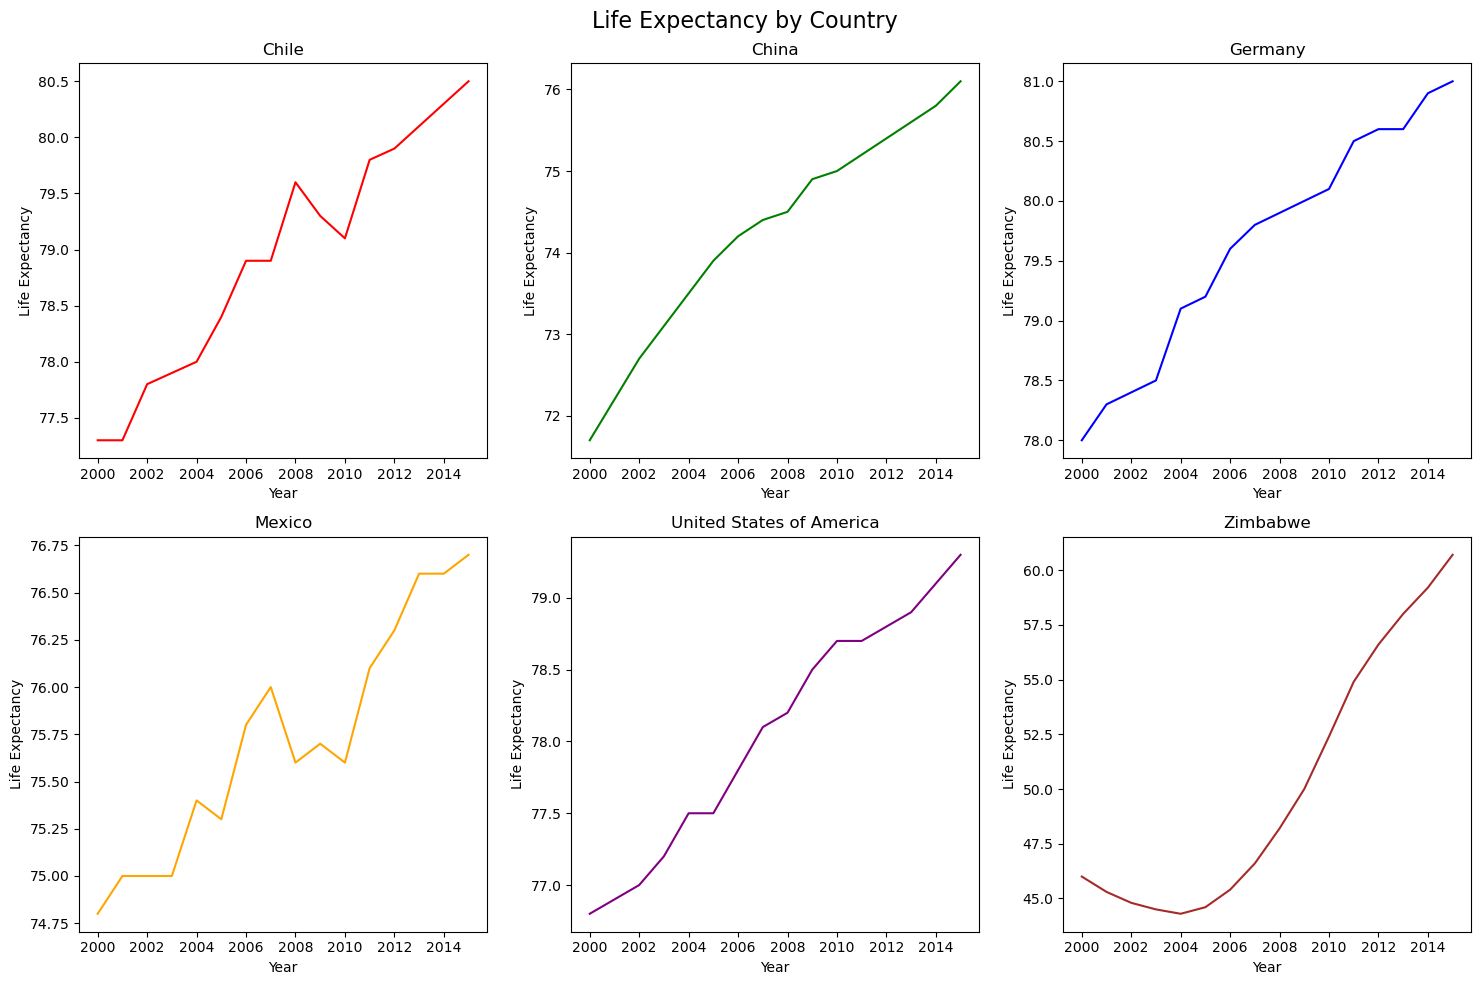

In [133]:
# Creating subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Life Expectancy by Country", fontsize=16)

# Getting unique countries
countries = data['Country'].unique()

#Colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

# Plotting data for each country
for i, country in enumerate(countries):
    row = i // 3
    col = i % 3

    # Extracting data for the current country
    country_data = data[data['Country'] == country]
    years = country_data['Year']
    life_expectancy = country_data['Life expectancy at birth (years)']

    # Creating a subplot for the current country
    ax = axs[row, col]
    ax.plot(years, life_expectancy, color=colors[i])
    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Life Expectancy")

# Adjusting spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Conclusion:
- Life expectancy has increased over time in six countries, especially in Zimbabwe 

# Has GDP increased over time in the six nations?

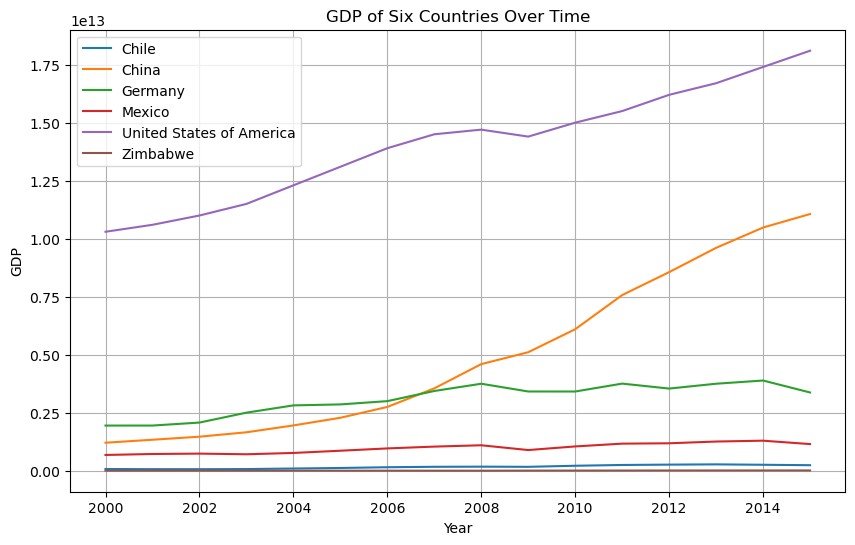

In [134]:
# Select data for the six countries
countries = data.Country.unique()
df_selected = data[data['Country'].isin(countries)]

# Plotting the data
plt.figure(figsize=(10, 6))

for country in countries:
    country_data = df_selected[df_selected['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'], label=country)

plt.title('GDP of Six Countries Over Time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

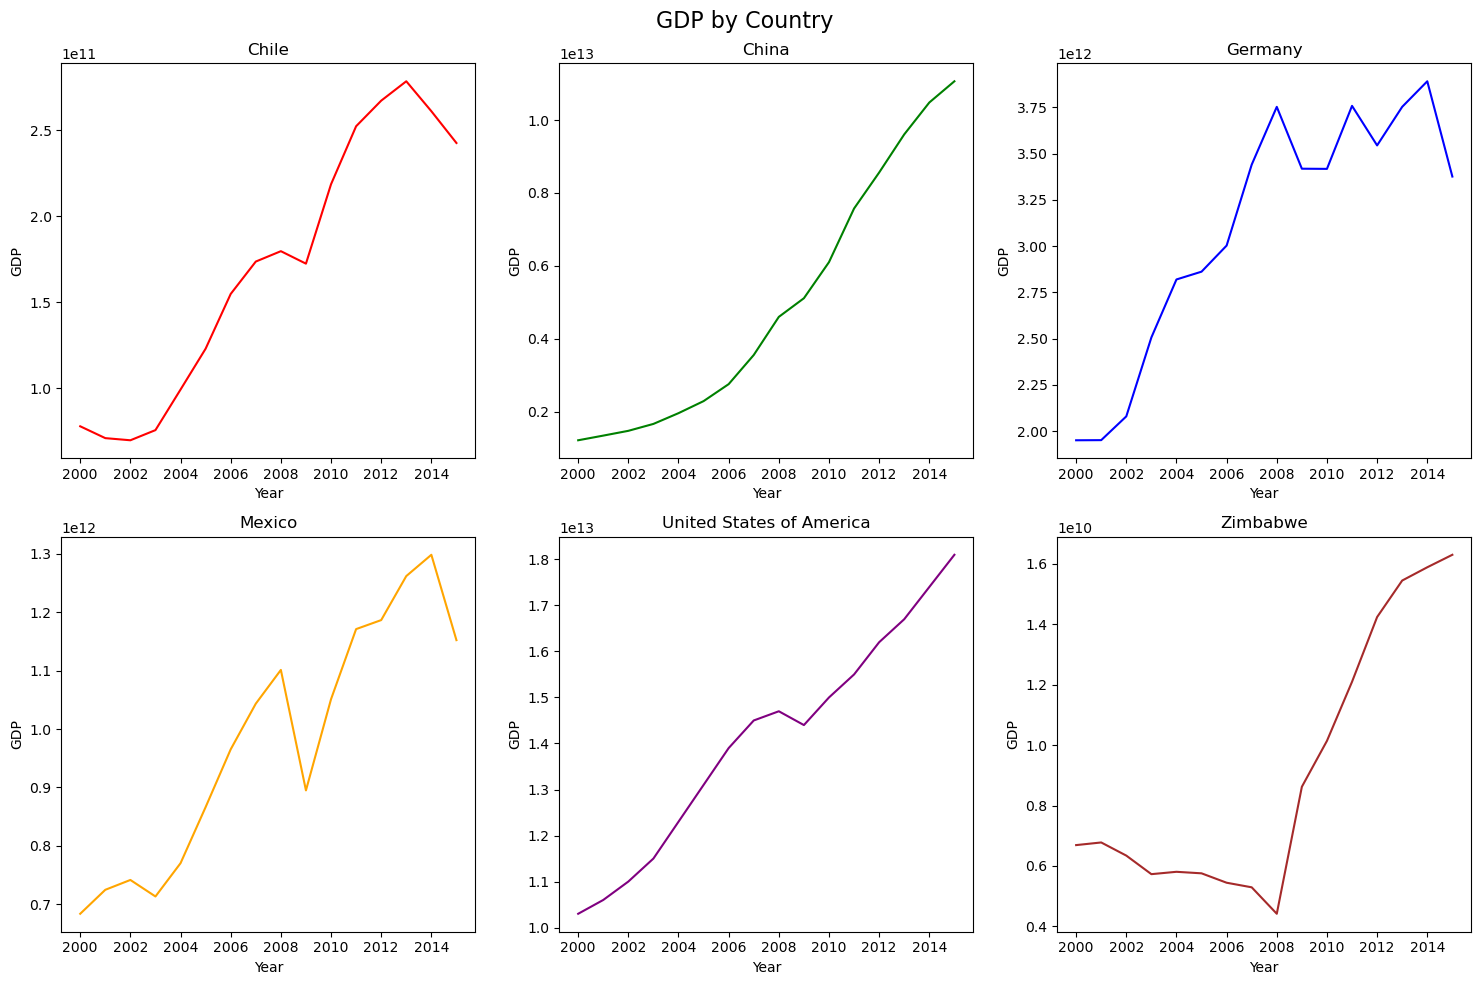

In [135]:
# Creating subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("GDP by Country", fontsize=16)

# Getting unique countries
countries = data['Country'].unique()

#Colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

# Plotting data for each country
for i, country in enumerate(countries):
    row = i // 3
    col = i % 3

    # Extracting data for the current country
    country_data = data[data['Country'] == country]
    years = country_data['Year']
    life_expectancy = country_data['GDP']

    # Creating a subplot for the current country
    ax = axs[row, col]
    ax.plot(years, life_expectancy, color=colors[i])
    ax.set_title(country)
    ax.set_xlabel("Year")
    ax.set_ylabel("GDP")

# Adjusting spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Conclusion:
- GDP also increased in all of the countries on our list, especially China.

# Is there a correlation between GDP and life expectancy of a country?

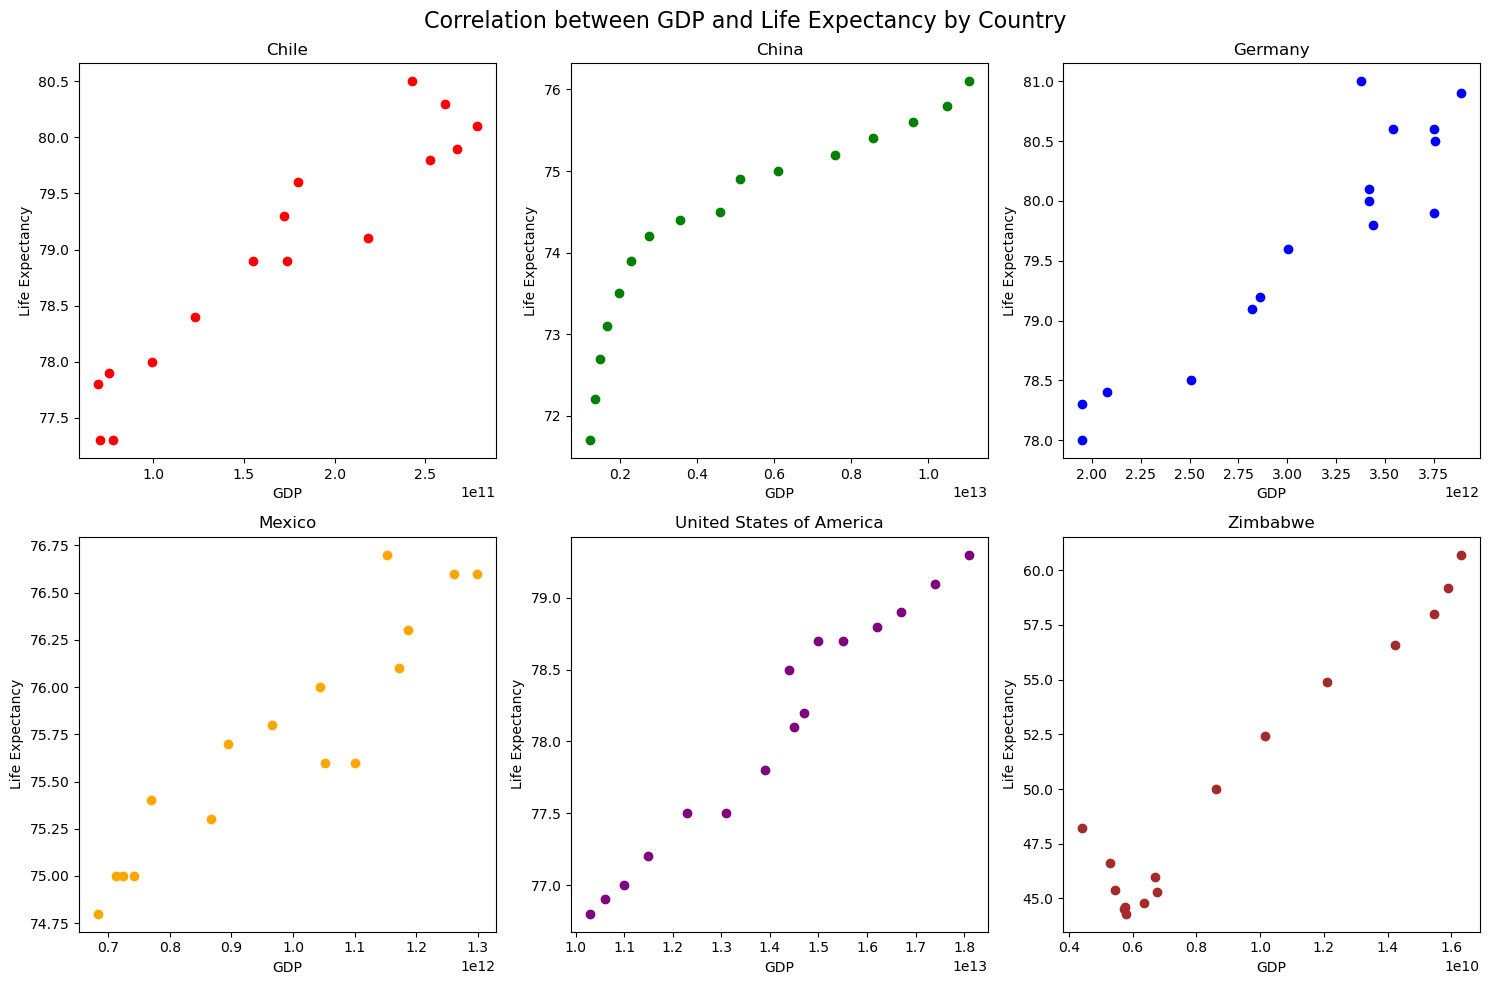

In [136]:
# Creating subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Correlation between GDP and Life Expectancy by Country", fontsize=16)

# Getting unique countries
countries = data['Country'].unique()

#Colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

# Plotting data for each country
for i, country in enumerate(countries):
    row = i // 3
    col = i % 3

    # Extracting data for the current country
    country_data = data[data['Country'] == country]
    gdp = country_data['GDP']
    life_expectancy = country_data['Life expectancy at birth (years)']

    # Creating a subplot for the current country
    ax = axs[row, col]
    ax.scatter(gdp, life_expectancy, color=colors[i])
    ax.set_title(country)
    ax.set_xlabel("GDP")
    ax.set_ylabel("Life Expectancy")

# Adjusting spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Conclusion:
- There is a positive correlation between GDP and life expectancy.

# What is the average life expectancy in these nations?

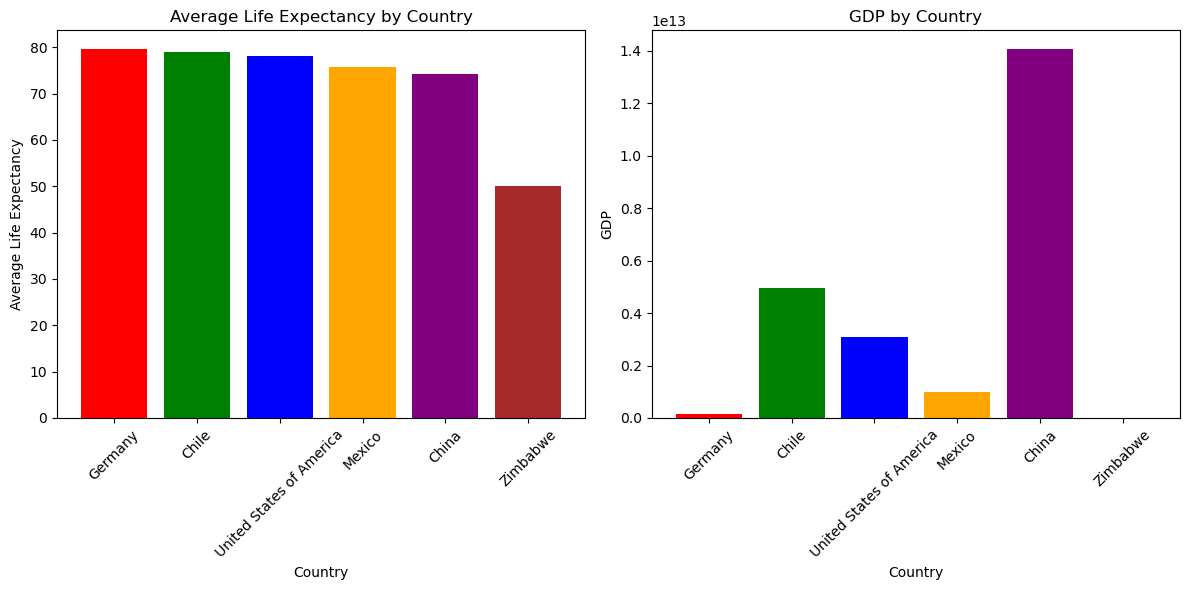

In [137]:
# Calculating average life expectancy for each country
average_life_expectancy = data.groupby('Country')['Life expectancy at birth (years)'].mean()

# Sorting countries based on average life expectancy
sorted_countries = average_life_expectancy.sort_values(ascending=False)

# Defining colors for the bars
num_countries = len(sorted_countries)
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Average Life Expectancy by Country
axes[0].bar(sorted_countries.index, sorted_countries, color=colors)
axes[0].set_title("Average Life Expectancy by Country")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Average Life Expectancy")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: GDP by Country
axes[1].bar(sorted_countries.index, data.groupby('Country')['GDP'].mean(), color=colors)
axes[1].set_title("GDP by Country")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("GDP")
axes[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Conclusion:
- The average life expectancy in countries around 75-80 years, with the exception of Zimbabwe, was 50 years.

# Distribution of that life expectancy and GDP

D:\DataScience\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


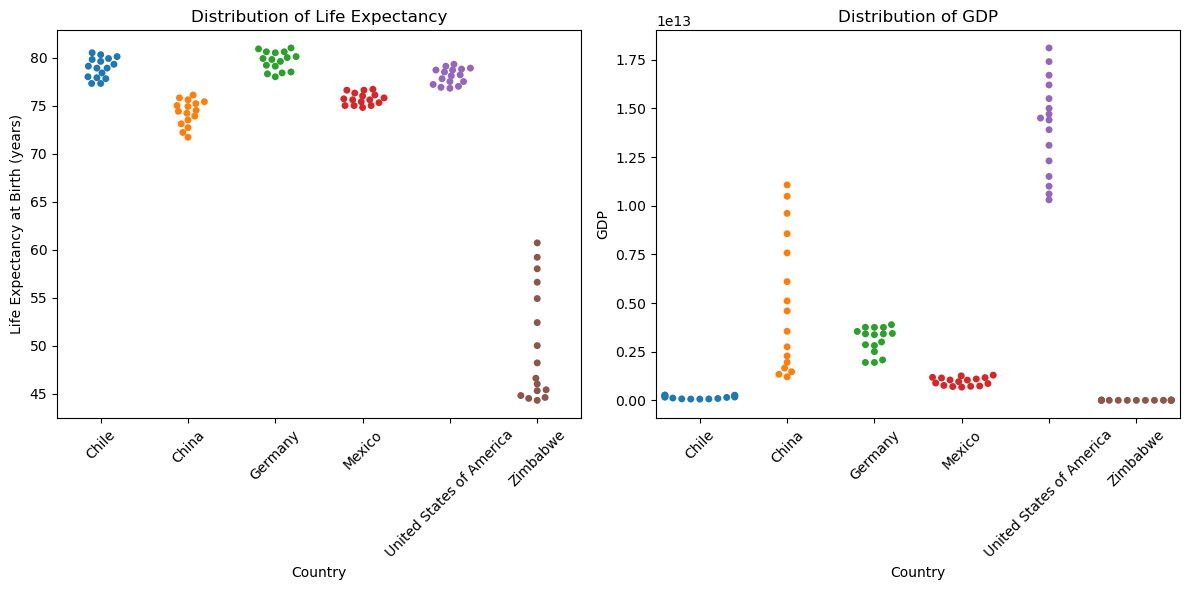

In [138]:
import seaborn as sns
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Distribution of Life Expectancy
sns.swarmplot(x='Country', y='Life expectancy at birth (years)', data=data, ax=axes[0])
axes[0].set_title("Distribution of Life Expectancy")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Life Expectancy at Birth (years)")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Distribution of GDP
sns.swarmplot(x='Country', y='GDP', data=data, ax=axes[1])
axes[1].set_title("Distribution of GDP")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("GDP")
axes[1].tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
